### CUSTOMER CHURN PREDICTION, SYRIATEL, TELECOMMUNICATION COMPANY. ###

### PROJECT BY : CAROLINE WAMBUI KIMANI ###

### BUSINESS UNDERSTANDING ###

##### In the telecommunications sector, customer churn presents a critical challenge for companies like SyriaTel. The goal is to create a predictive model to determine whether a customer is likely to discontinue their services with SyriaTel. This binary classification task seeks to identify patterns in customer behavior and demographics that signal a likelihood of churn. By doing so, SyriaTel can mitigate the financial impact of churn by deploying proactive customer retention strategies. #####


### PROBLEM STATEMENT ###

##### SyriaTel faces the challenge of customer retention in a competitive telecommunications market, where churn leads to revenue losses and impacts its market reputation. The goal is to develop a predictive model to identify customers at risk of churning, enabling the company to proactively implement targeted retention strategies and reduce churn. #####

### OBJECTIVES ###

##### The objective is to design an optimal model for predicting customer churn at SyriaTel,the insights will be key in helping the company stakeholders such as Customer Retention Team,Marketing and Sales Team, Customer Support Team,Data Analytics Team, Business Executives and Decision Makers mitigate financial losses through implementation of customer retention strategies. #####








### DATA UNDERSTANDING ###


#### Data Description ####

##### This dataset contains information on 3,333 customers of the telecommunications company "SyriaTel." It features 20 attributes, including customer demographics, call usage patterns during different times of the day, and subscription details such as voice mail and international plans. The account length attribute indicates how long a customer has been with SyriaTel, offering a valuable measure of their lifetime value. This dataset was also sourced from Kaggle #####

### DATA PREPARATION ###


##### This section prepares the data for EDA and Modeling. The dataset will be checked for:
##### 1.Duplicated rows 
##### 2.Missing values 
##### 3.Irrelevant columns as they may not add to the analysis ####

In [4]:
#import the relevant libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler



In [5]:
# Load the dataset 
data =pd.read_csv(r'Churn _In _Telecom.csv')

# Check the first five rows
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
# Check the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [7]:
# Description of the data
data.describe

<bound method NDFrame.describe of      state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                yes   

### Data Cleaning ###

In [8]:
# Check for missing values
data.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [9]:
# Check for duplicate values
data.duplicated().sum()

0

In [10]:
# Convert 'churn' column to numeric (0,1)
data['churn'] = data['churn'].astype(int)
data.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int32
dtype: object

##### The data has no missing values or duplicates #####

### DATA ANALYSIS ###


### Churn Distribution ###

churn
0    2850
1     483
Name: count, dtype: int64


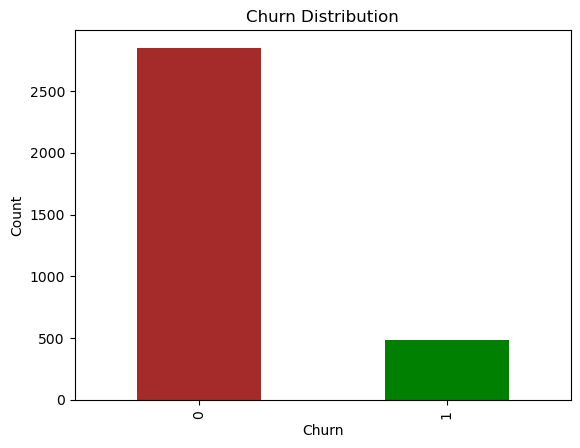

In [11]:
# Distribution of customers by churn rate
print(data['churn'].value_counts())

# Plotting the bar chart with different colors for each area churn label whether true or false
colors = [ 'brown', 'green'] 

# Plot the data
data['churn'].value_counts().plot(kind='bar', color=colors, title='Churn Distribution', xlabel='Churn', ylabel='Count')

# Show the plot
plt.show()



##### Among the 3,333 customers in the dataset, 483 have canceled their contracts with SyriaTel, representing 14.5% of the total customer base. This reflects an imbalance in the distribution of the binary classes, which must be addressed prior to modeling to avoid skewed predictions and inaccurate results.  #####

### Area Code Distribution ###

area code
415    1655
510     840
408     838
Name: count, dtype: int64


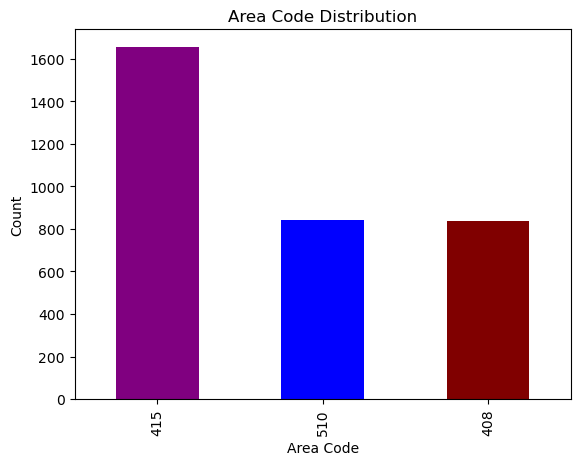

In [12]:
# Distribution of customers by area code
print(data['area code'].value_counts())

# Plotting the bar chart with different colors for each area code
colors = [ 'purple', 'blue','maroon'] 

# Plot the data
data['area code'].value_counts().plot(kind='bar', color=colors, title='Area Code Distribution', xlabel='Area Code', ylabel='Count')

# Show the plot
plt.show()

##### Area code 415 has the highest number of customers leading by 1655, followed by area code 510 and 408 with such a minimal gap in the number of customers. #####

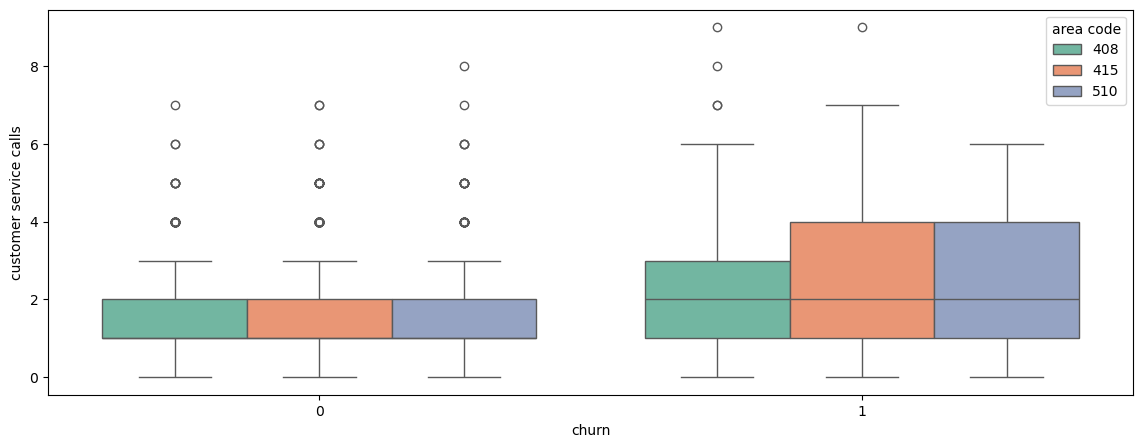

In [13]:
# Creating a boxplot to check for outliers in the area codes
plt.figure(figsize=(14, 5))

# Plotting the boxplot with different colors for each area code
sns.boxplot(data=data, x='churn', y='customer service calls', hue='area code', palette='Set2')

# Show the plot
plt.show()

##### Outliers are present across all area codes among customers who have not churned. However, customers who have churned are more likely to have area codes 415 or 510. #####

### Distribution of Features ###

<Figure size 1500x1200 with 0 Axes>

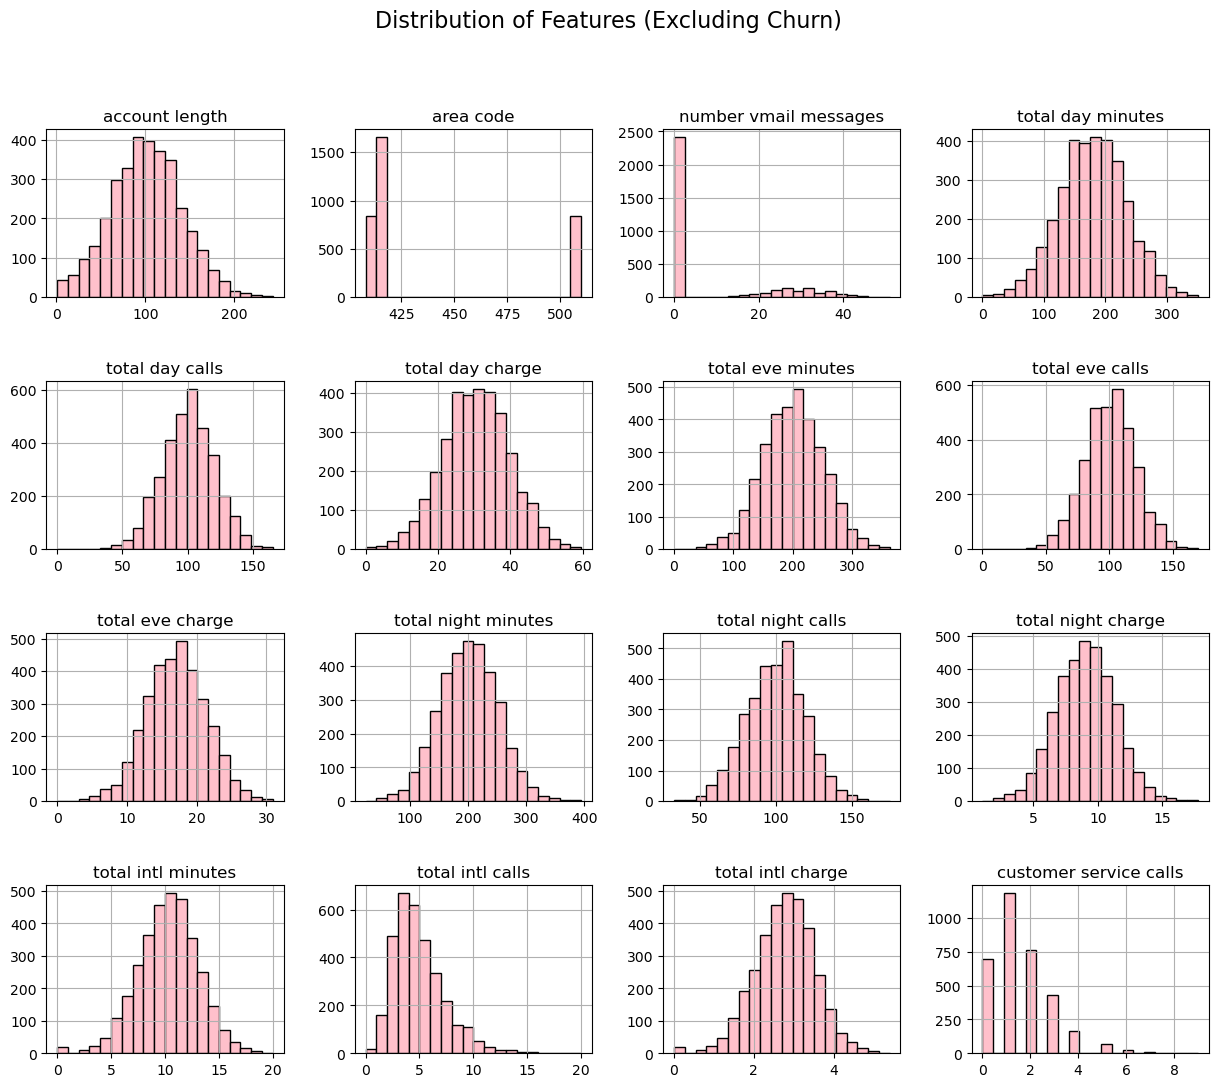

In [14]:
# Distribution of features without the 'churn' column
# Drop the churn column
features_data = data.drop(columns='churn')

# Plot histograms for all features (excluding churn)
plt.figure(figsize=(15, 12))
features_data.hist(bins=20, color='pink', edgecolor='black', figsize=(15, 12))

# Add a title and labels to the plot
plt.suptitle('Distribution of Features (Excluding Churn)', fontsize=16)
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Display the plot
plt.show()

##### The histograms created for each feature in the dataset show how the values are spread out across different features (excluding the 'churn' column).
##### Categorical Features: Features like 'state', 'area code', 'international plan', and 'voice mail plan' have distinct categories. These features usually have just a few unique values (like a few states or yes/no options for the plans), and some categories appear more often than others.
##### Numerical Features: Account-related Features: 'account length' shows that most customers have shorter accounts, with only a few having longer ones.
##### Phone Number and Service Usage Features: Features like 'phone number' and 'number vmail messages' have a more even spread, with many values falling within a certain range.
##### Time-Based Usage Features: Features like 'total day minutes', 'total night minutes', and 'total intl minutes' are right-skewed. Most customers use fewer minutes, while only a few use a lot.
##### Calls and Charges: 'total day calls', 'total night calls', and their related charges show similar patterns, where most customers make a moderate number of calls and pay lower charges, but a few use a lot or hardly any.
##### Customer Service and International Features: The 'customer service calls' feature shows that most customers don’t contact customer service often, with only a few making more calls. Features like 'total intl calls' and 'total intl charge' are also skewed, with most customers making only a few international calls, so the values cluster in the lower range.
##### The histograms show how the values of each feature are spread out, that is if they are skewed or uniform, and help decide how to prepare the data for further analysis. #####




### Boxplot of Continous Features ###

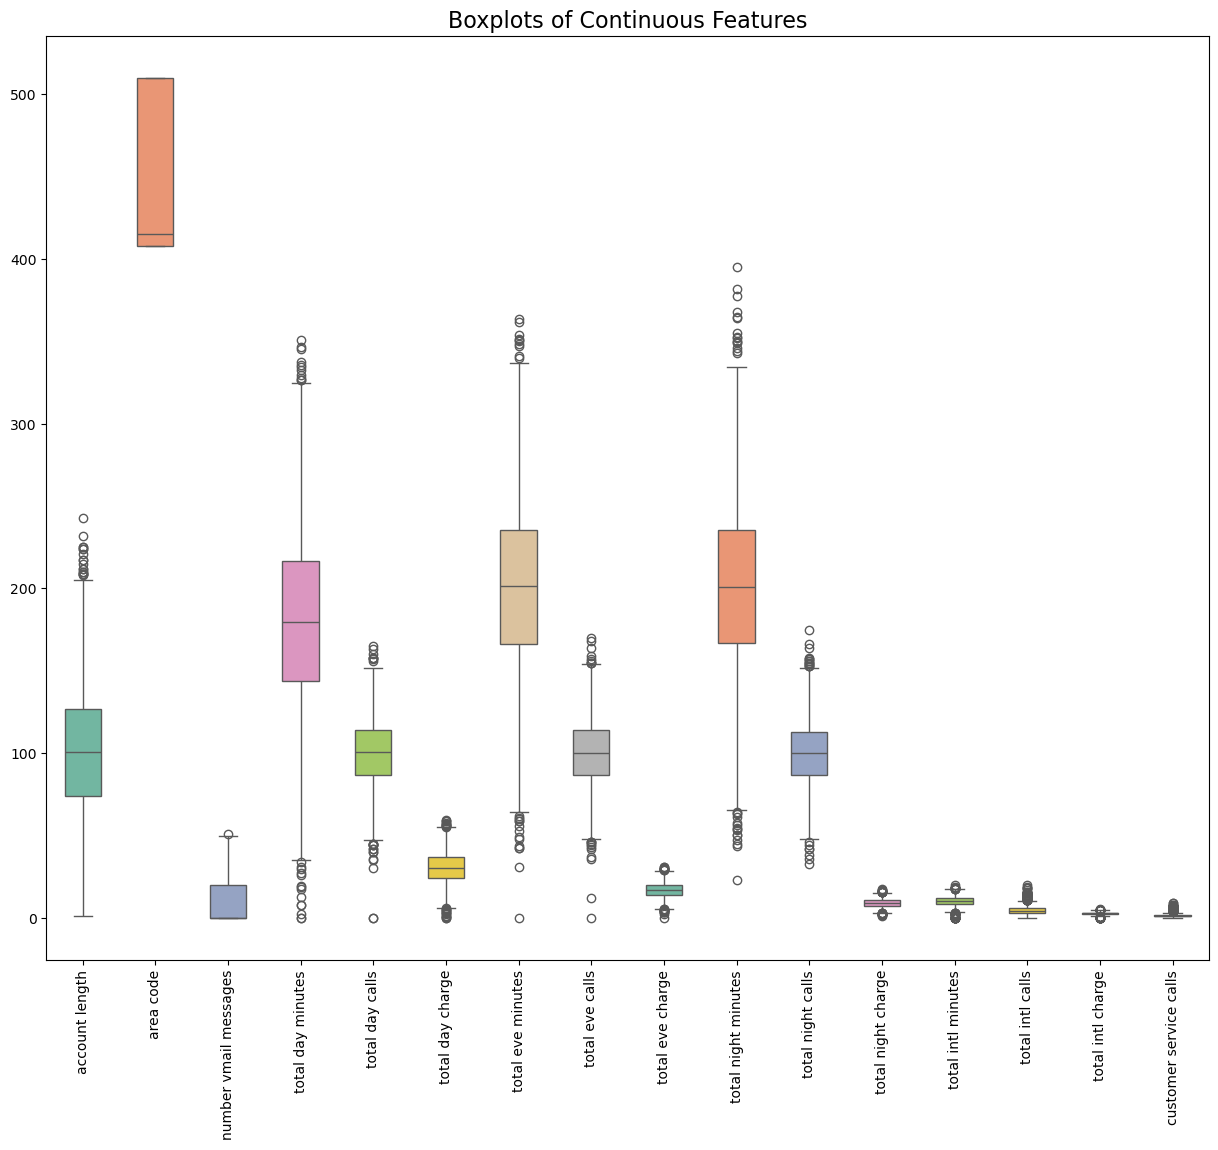

In [15]:
# Create boxplots for continuous features to visualize outliers
plt.figure(figsize=(15, 12))

# Plotting of the boxplot for the features
sns.boxplot(data=features_data,width=0.5, palette='Set2')
plt.title('Boxplots of Continuous Features', fontsize=16)
plt.xticks(rotation=90)

# Display the plot
plt.show()

##### The boxplots show that there are some outliers in many of the features. These outliers are customers with really high usage (like minutes or calls) or high charges compared to others. These are important because they help us show customers who act differently from the majority.
##### Skewed Distribution: Many features, especially the ones related to usage (like minutes or calls), show a right-skewed distribution. This means most customers use fewer minutes or make fewer calls, while only a small number use a lot.For features like 'customer service calls', most customers don't contact customer service very often. Similarly, for usage-related features, most customers have more moderate values.In conclusion, the boxplots help show that while most customers have typical usage patterns, there are a few customers who stand out with much higher values #####

### Distribution by International Plan ###

international plan
no     3010
yes     323
Name: count, dtype: int64


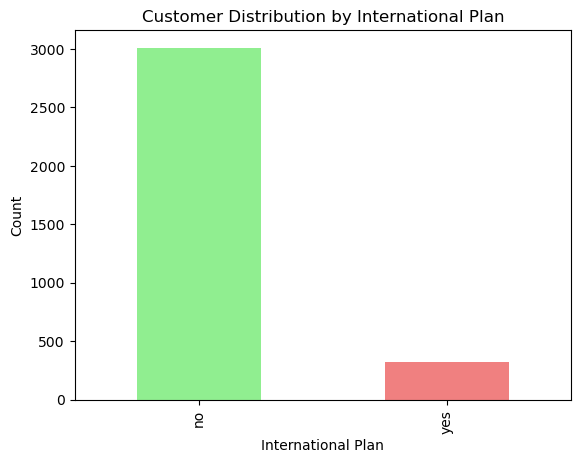

In [16]:
# Distribution of customers by international plan
print(data['international plan'].value_counts())

# Plotting the bar chart with different colors for each category (Yes and No)
colors = ['lightgreen', 'lightcoral'] 

# Plot the data
data['international plan'].value_counts().plot(kind='bar', color=colors, title='Customer Distribution by International Plan', xlabel='International Plan', ylabel='Count')

# Show the plot
plt.show()

##### The bar chart shows how many customers have an international plan, and it helps in checking if the plan has an effect on customer churn. We see that 3010 do not have an international plan and 323 customers have an international plan. If more customers without an international plan are churning then it might mean that having the plan helps to retain customers and if more customers with the international plan are churning, it might mean the plan does not help to keep customers #####

### Voice Mail Plan Churn Rate ###

voice mail plan
no     2411
yes     922
Name: count, dtype: int64


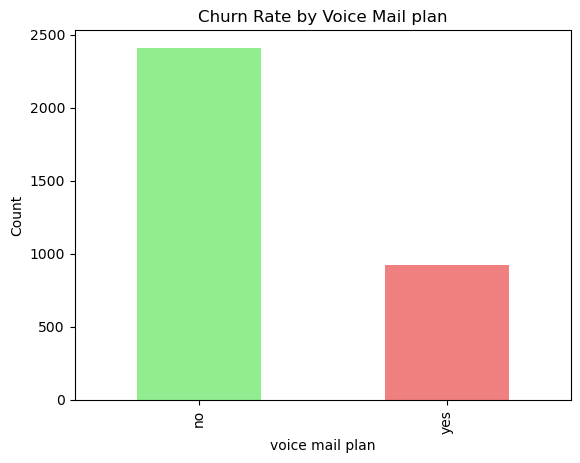

In [17]:
# Distribution of customers by voice mail plan churn rate
print(data['voice mail plan'].value_counts())

# Plotting the bar chart with different colors for each category (Yes and No)
colors = ['lightgreen', 'lightcoral'] 

# Plot the data
data['voice mail plan'].value_counts().plot(kind='bar', color=colors, title='Churn Rate by Voice Mail plan', xlabel='voice mail plan', ylabel='Count')

# Show the plot
plt.show()

##### The distribution of the voice mail plan can be useful for understanding churn patterns. By analyzing the churn rate for both groups ('Yes' and 'No'), we can explore if customers with a voice mail plan have a different likelihood of churning compared to those without one.If the 922 customers who have a voice mail plan are churning, this could suggest that the voice mail plan does not significantly help retain customers.,However if 2411 customers without a voice mail plan ('No') show a higher churn rate, it might indicate that having a voice mail plan could be beneficial for customer retention. #####

### Total Minutes by Category ###

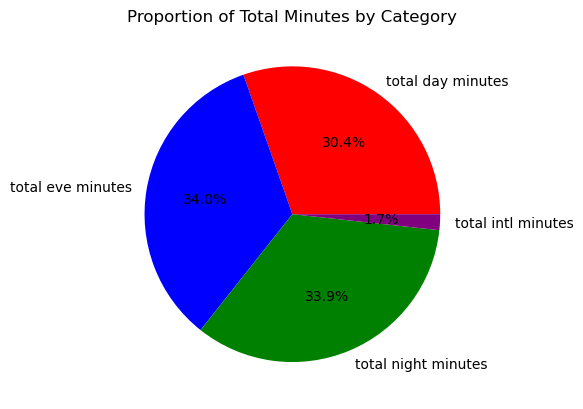

In [18]:
# Sum for each column
sums = data[['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']].sum()

# Plot a pie chart with colors
plt.pie(sums, labels=sums.index, autopct='%1.1f%%', colors=['red', 'blue', 'green', 'purple'])
plt.title('Proportion of Total Minutes by Category')
plt.show()

##### The pie chart helps to visualize the distribution of total minutes across different categories, showing which category (day, evening, night, or international) makes up the largest part of the total minutes used by customers.So far we can see that customers preferrence for calls is evening and night time.This can help the company develop tarrifs that meet the preferences of the customers  #####

### Total Day Minutes and Total International Minutes Distribution ###

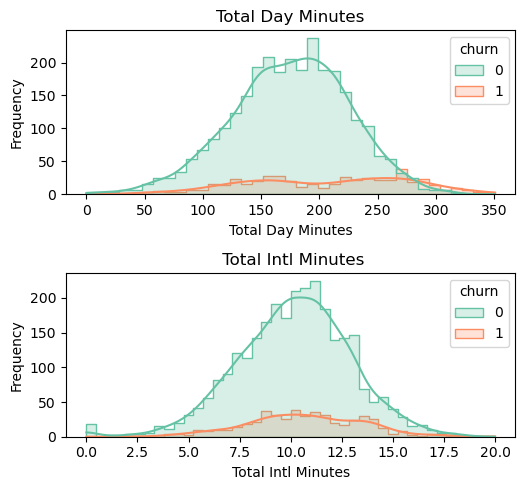

In [19]:
plt.figure(figsize=(10, 5))


# Histogram of Total Day Minutes
plt.subplot(2, 2, 2)
sns.histplot(data=data, x='total day minutes', hue='churn', kde=True, palette='Set2', element='step', fill=True)
plt.title('Total Day Minutes')
plt.xlabel('Total Day Minutes')
plt.ylabel('Frequency')


# Histogram of Total Intl Minutes
plt.subplot(2, 2, 4)
sns.histplot(data=data, x='total intl minutes', hue='churn', kde=True, palette='Set2', element='step', fill=True)
plt.title(' Total Intl Minutes')
plt.xlabel('Total Intl Minutes')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()


##### Total Day Minutes:
##### * The histogram shows how daytime call usage varies between churned and non-churned customers.A noticeable difference in the distribution (churned customers using significantly more or fewer minutes) might suggest a relationship between heavy or light daytime usage and churn.
##### Total International Minutes:
##### * The histogram highlights international call usage for churned and non-churned customers.Any disparity in usage, such as churned customers using fewer international minutes, could indicate dissatisfaction with international plans or pricing. 
##### The visualizations reveal patterns in customer behavior regarding daytime and international call usage. These patterns can help identify potential triggers for churn, such as dissatisfaction with specific services or usage limits. Addressing these issues through targeted strategies, like improving plans or offering incentives, could reduce churn and enhance customer retention. #####









### International Plan and Voice Mail Plan Distribution ###

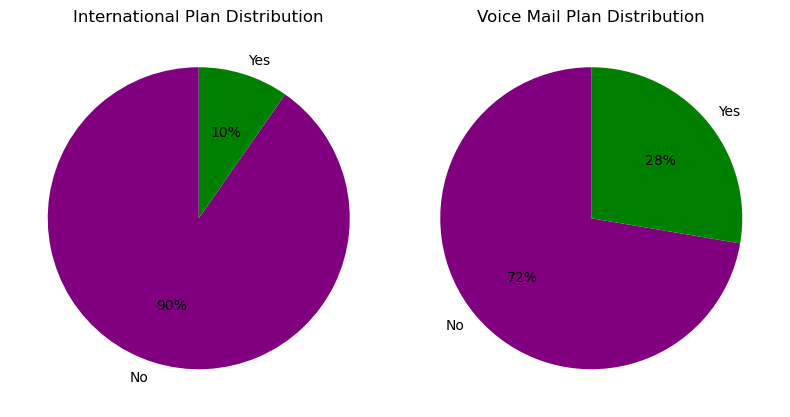

In [20]:
#  colors for the pie charts
colors = ['purple', 'green']

# Create a figure with two subplots
plt.figure(figsize=(8, 5))

# Plot first pie chart (International Plan Distribution)
plt.subplot(1, 2, 1)
plt.pie(data['international plan'].value_counts(), labels=['No', 'Yes'], autopct='%.0f%%', startangle=90, colors=colors)
plt.title('International Plan Distribution')

# Plot the second pie chart (Voice Mail Plan Distribution)
plt.subplot(1, 2, 2)
plt.pie(data['voice mail plan'].value_counts(), labels=['No', 'Yes'], autopct='%.0f%%', startangle=90, colors=colors)
plt.title('Voice Mail Plan Distribution')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

##### The two pie charts provide a visual comparison of the number of customers with and without an international plan and a voice mail plan. These insights provide an understanding on whether the services are essential or not among the company's customer base and by understanding this distribution it can help guide the company on retention or marketing strategies to put in place #####


### Customer Service and Customer Churn Rate ###

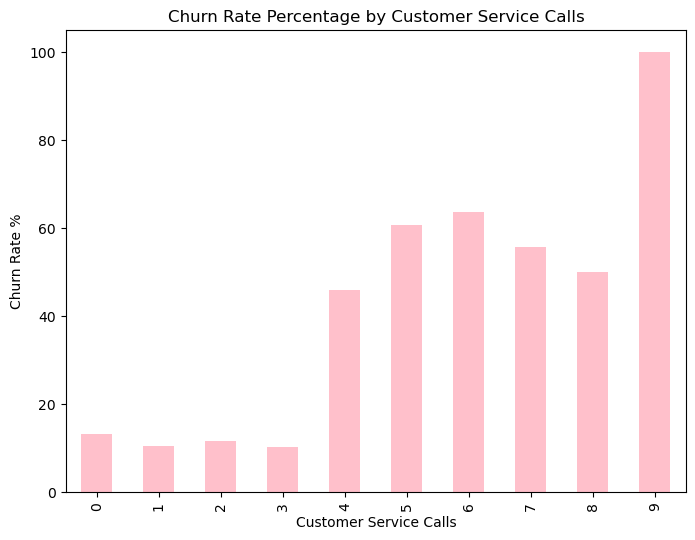

In [21]:
# Calculate churn rate percentage for each number of customer service calls
churn_rate = data.groupby('customer service calls')['churn'].mean() * 100

# Plotting a bar plot
churn_rate.plot(kind='bar', figsize=(8, 6), color='Pink')

# Adding title and labels
plt.title('Churn Rate Percentage by Customer Service Calls')
plt.xlabel('Customer Service Calls')
plt.ylabel('Churn Rate %')

# Display the plot
plt.show()


##### Churn increases with more customer service calls:
##### * As the number of customer service calls rises, the churn rate typically increases.This suggests that customers who frequently contact customer service may be experiencing unresolved issues or dissatisfaction.
##### High churn for frequent callers:
##### * Groups with the highest number of calls to customer service tend to have significantly higher churn rates, indicating that poor service resolution could be a driving factor in customer loss.
##### Conclusion:
##### The analysis highlights a strong correlation between customer service interactions and churn. Customers who contact customer service more often are more likely to leave. This suggests that improving customer support efficiency and resolution rates could be an effective strategy to reduce churn. #####

### Correlation Metric ###

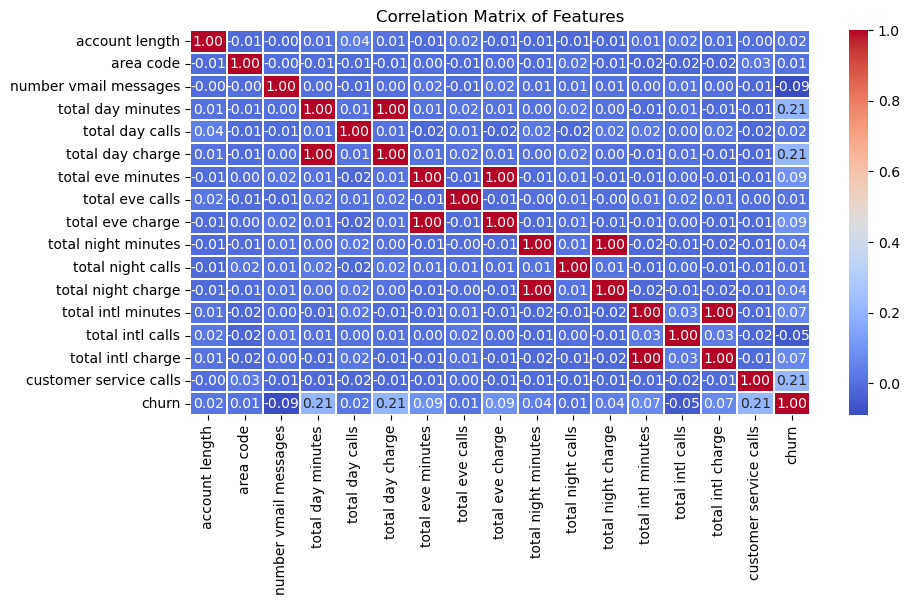

In [22]:
# Excluding non-numeric columns
numeric_df = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_metric = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr_metric, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.2)
plt.title('Correlation Matrix of Features')
plt.show()

##### Strong Positive Correlations:
##### * Minutes and Charges: The more minutes a customer uses (day, night, or evening), the higher their charges. For example, more "total day minutes" means higher "total day charge."
##### * International Usage and Charges: Customers who use more international minutes also tend to pay more for international calls.
##### Moderate Correlations:
##### * Voicemail Messages and Customer Service Calls: There may be a small link between customers who leave more voicemail messages and those who contact customer service more often 
##### Weak or No Correlations:
##### * Account Length: How long a customer has been with the service doesn’t seem to affect their usage or charges much.
##### * Phone Numbers: These don’t relate to other features like usage or charges.
##### Negative Correlation:
##### * There were no strong negative correlations found in this dataset.
##### Conclusion:
##### The heatmap shows that customer usage (like minutes) is strongly linked to the charges they pay. This can help us predict a customer's charges based on how much they use the service.Features like account length don’t seem to affect usage or charges much, so they might not be as helpful in predicting customer behavior.  #####

### Calculating the Correlation Metrics ###

In [23]:
# Remove non-numeric columns
numeric_df = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_metric = numeric_df.corr()

# Sort  values for 'churn' column in descending order
churn_corr = corr_metric['churn'].sort_values(ascending=False)

# Display the sorted correlation values
churn_corr

churn                     1.000000
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
Name: churn, dtype: float64

### DATA MODELLING ###

### Multicollinearity of Features ###

In [24]:
# independent variables  to check multicollinearity
X = data[['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']]

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data


,feature,VIF
0,total day minutes,9.673057
1,total eve minutes,12.026619
2,total night minutes,12.000415
3,total intl minutes,10.844008


In [25]:
# drop the columns with high correlation
cols_drop = ['total day charge', 'total eve charge', 'total night charge', 'total intl charge']
df = data.drop(cols_drop, axis=1)
df.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0


In [26]:
# Check for the data types
data.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int32
dtype: object

In [27]:
#Apply one hot encoding to the data
data = pd.get_dummies(data, columns=['state', 'international plan', 'voice mail plan'], drop_first = True)

In [28]:
data.drop('phone number', axis=1, inplace=True)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 69 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   number vmail messages   3333 non-null   int64  
 3   total day minutes       3333 non-null   float64
 4   total day calls         3333 non-null   int64  
 5   total day charge        3333 non-null   float64
 6   total eve minutes       3333 non-null   float64
 7   total eve calls         3333 non-null   int64  
 8   total eve charge        3333 non-null   float64
 9   total night minutes     3333 non-null   float64
 10  total night calls       3333 non-null   int64  
 11  total night charge      3333 non-null   float64
 12  total intl minutes      3333 non-null   float64
 13  total intl calls        3333 non-null   int64  
 14  total intl charge       3333 non-null   

### Training the Data ###

In [30]:
# Splitting the dataset into features (X) and target variable (y)

y = data['churn']
X = data.drop(columns=['churn'])



# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling the Data ###

In [31]:
# Create StandardScaler object
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled.head()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
0,0.676489,-0.523603,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,...,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781,-0.327580,1.617086
1,0.149065,-0.523603,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,...,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781,-0.327580,1.617086
2,0.902529,-0.523603,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,...,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781,-0.327580,-0.618396
3,-0.428590,-0.688834,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,...,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781,3.052685,-0.618396
4,-0.654629,-0.523603,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,...,-0.14859,-0.14859,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781,3.052685,-0.618396


In [32]:
# Calculate the distribution of the target variable
class_distribution = data['churn'].value_counts()

# Check if the dataset is imbalanced
if class_distribution[0] / class_distribution[1] > 2 or class_distribution[1] / class_distribution[0] > 2:
    print("The dataset is imbalanced.")
else:
    print("The dataset is balanced.")

The dataset is imbalanced.


In [33]:

# Initialize SMOTE object

smote = SMOTE(random_state=42)

# Apply SMOTE to training Data

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize the logistic regression model

model = LogisticRegression()

# Train  model on the resampled data

model.fit(X_train_smote, y_train_smote)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:

# Create a logistic regression model
logreg = LogisticRegression(fit_intercept= False, C=1e12, solver='liblinear')

# Fit the model on the training data
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [35]:
# Generate predictions on the test set
y_pred = logreg.predict(X_test)

In [36]:
# Calulate the performance metrics

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

# F1-score
f1 = f1_score(y_test, y_pred)

# Calculate AUC for Logistic Regression
auc_lr = roc_auc_score(y_test, y_pred)



print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("auc_lr:", auc_lr)

Accuracy: 0.8515742128935532
Precision: 0.53125
Recall: 0.16831683168316833
F1-score: 0.2556390977443609
auc_lr: 0.570907532449358


##### 1.  Accuracy is high (85%), but this is likely due to the imbalanced nature of the dataset, where the model might be mostly predicting non-churn customers (the majority class) correctly.
##### 2. The model's precision is average (53%), meaning that when it predicts a customer will churn, it's only correct about half the time.
##### 3. The recall is very low (16.83%), indicating that the model is missing most of the churners, which is problematic if the goal is to predict and prevent churn.
##### 4. The F1-score of 0.2556 reinforces that the model struggles to balance Precision and Recall.
##### 5. The AUC of 0.5709 shows that the model has limited ability to distinguish churners from non-churners. #####


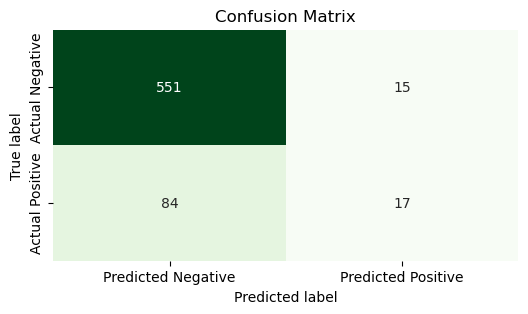

In [37]:
# Generate predictions on the test set
y_pred = logreg.predict(X_test)

# Build confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#Visualize the Matrix
plt.figure(figsize=(6,3))
sns.heatmap(conf_matrix, annot=True, cmap='Greens', fmt='g', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

##### 1. True Positives (TP): Represents customers who churned and were correctly predicted as churners and they happen to be 17.
##### 2. True Negatives (TN): Represents customers who did not churn and were correctly predicted as non-churners and they summate a total of 551 customers.
##### 3. False Positives (FP): Represents customers who did not churn but were incorrectly predicted as churners and they are 15. 
##### 4. False Negatives (FN): Represents customers who did churn but were incorrectly predicted as non-churners and they are 84.  #####

In [38]:
# Create an instance of DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [39]:
# Generate predictions on the test set

y_pred_dt = dt.predict(X_test)

In [40]:
# Calculate the performance metrics

accuracy_dt = accuracy_score(y_test, y_pred_dt)

precision_dt = precision_score(y_test, y_pred_dt)

recall_dt = recall_score(y_test, y_pred_dt)

f1_dt = f1_score(y_test, y_pred_dt)

# Calculate AUC for  Decision Tree
auc_dt = roc_auc_score(y_test, y_pred_dt)

# Print the performance metrics

print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-score:", f1_dt)
print("auc_dt:", auc_dt)

Accuracy: 0.9295352323838081
Precision: 0.7872340425531915
Recall: 0.7326732673267327
F1-score: 0.7589743589743589
auc_dt: 0.8486687891403981


##### 1. The model has an Accuracy of 92.95%, which shows it’s doing well overall, but this could be because the dataset has more non-churn customers.
##### 2. Precision of 78.72%, indicates that the model’s churn predictions are mostly correct, which is important if false positives (predicting churn when customers don’t actually churn) are a problem.
##### 3. The Recall is 73.27%, meaning that the model identifies most churners, but still misses about 27% of them. This means that some churners aren’t being identified.
##### 4. The F1-score of 0.7590 shows that the model balances Precision and Recall well however the recall can be improved.
##### 5. The AUC of 0.8487 indicates that the model is good at telling the difference between churners and non-churners, making it a great choice for this task. #####

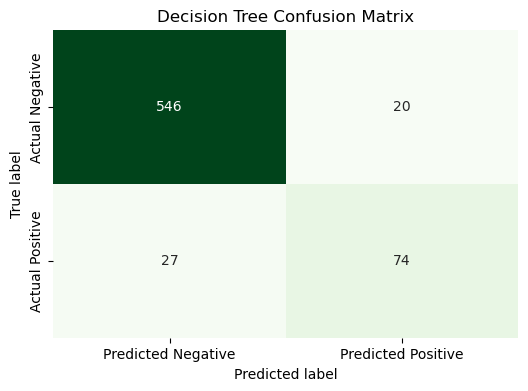

In [41]:
# Generate predictions on the test set
y_pred_dt = dt.predict(X_test)

# Build confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

 # Visualize the Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dt, annot=True, cmap='Greens', fmt='g', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Decision Tree Confusion Matrix')
plt.show()

##### 1. True Positives (TP):With a value of 74 it shows that the model is effectively identifying churn customers, which is important for a churn prediction task.
##### 2. True Negatives (TN): High value of 546 means that the model is accurately predicting non-churn customers.
##### 3. False Positives (FP): 27 indicates that the model is falsely predicting non-churn customers as churners. This might result in unnecessary actions to retain customers who weren't actually going to leave.
##### 4. False Negatives (FN): 20 indicates that the model is missing churn customers (predicting them as non-churners). This could be problematic because it means that the model is failing to identify customers who might leave.

### The AUC Values of Logistic Regression and Decision Tree Model ###

In [42]:
# Get predicted probabilities for Logistic Regression
y_prob_lr = logreg.predict_proba(X_test)[:, 1]

 #Get predicted probabilities for decision tree
y_prob_dt = dt.predict_proba(X_test)[:, 1]

# Get ROC curve for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)

# Get ROC curve for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)



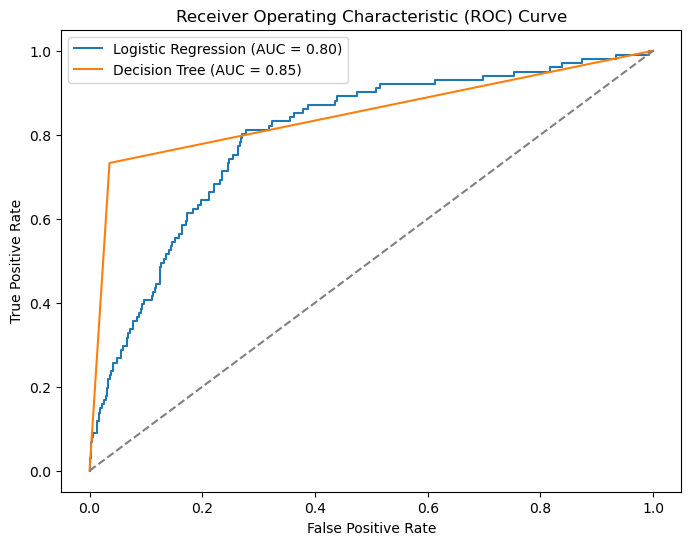

In [43]:
# Calculate AUC ROC scores
auc_lr = roc_auc_score(y_test, y_prob_lr)
auc_dt = roc_auc_score(y_test, y_prob_dt)


# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')

# Plot ROC curve for random guessing
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


##### AUC Scores: 
##### * Logistic Regression (AUC): This model has an AUC of about 0.80, which means it does a great job of distinguishing between churners and non-churners. The closer the AUC is to 1, the better the model is at correctly identifying both churn and non-churn cases.

##### * Decision Tree (AUC): The Decision Tree model has a slightly lower AUC of 0.85, this indicates it’s not quite as strong as Logistic Regression in distinguishing between churners and non-churners. ##### 

##### ROC Curves:
##### * The ROC curve for Logistic Regression is closer to the top-left corner, meaning it has a better balance between the True Positive Rate and False Positive Rate. We can therefore conclude that Logistic Regression is better at identifying churners while making fewer errors.

##### * The Decision Tree ROC curve is farther from the top-left corner, meaning it's not performing as well as Logistic Regression, but it’s still able to show predictions just not as strong as Logistic Regression. ######

##### Random Guessing:
##### * The dashed grey line represents random guessing (AUC = 0.5), proving that both models are definitely doing better than random guesses.It therefore confidently identifies that both models are making meaningful predictions. #####
 


### CONCLUSIONS ###

##### Model Performance:
##### * Logistic Regression shows promising predictive ability by balancing precision and recall effectively. With an AUC score of 0.80, this indicates that it's reliable in classifying data.
##### * Decision Trees however in as much as it achieves a marginally higher AUC, proves to be less consistent in distinguishing between churners and non-churners.
##### Imbalanced Dataset:
##### * The high accuracy of the models are influenced by the imbalance between churn and non-churn customers. This imbalance impacts recall, which is crucial for correctly identifying potential churners.
##### Churn Detection:
##### * The low recall for predicting churn indicates that the model might not be able to fully capture the patterns in customer behavior that lead to churn, therefore limiting its effectiveness in supporting proactive retention efforts. #####

### RECOMMENDATIONS ###

##### 1. Focus on High-Risk Customers: SyriaTel should prioritize customers who are most likely to churn for retention efforts by offering personalized incentives like discounts, loyalty rewards, or improved service plans to keep them engaged.

##### 2. Improve Customer Experience: They should take into account customer feedback to understand common issues like poor service or technical problems.SyriaTel can address these concerns by improving infrastructure or expanding customer support teams to enhance overall service quality.

##### 3. Personalize Customer Engagement:They should segment customers based on behavior and tailor communication to their needs, eg by providing flexible payment options to customers who often face billing issues.

##### 4. Monitor Key Churn Predictors: The retention team should pay attention to top factors identified by the model, such as high monthly charges or short tenure, which may indicate dissatisfaction by setting up alerts for these conditions for early intervention. 

##### 5. Refine Pricing Plans: There should be an evaluation on how pricing affects high-risk customers and consider offering more competitive plans or bundled services to add value and retain them.

##### 6. Encourage Long-Term Commitments: The company can introduce loyalty programs or discounts for customers who sign long-term contracts.They can also offer perks like free upgrades or additional services for early renewals.

##### 7. Promote Cross-Selling Opportunities: Marketing team should identify customers who might benefit from additional services based on their usage.This can be done by offering bundled packages that increase engagement and reduce the chances of churn.

##### 8. Educate Customers:Keeping customers informed about service benefits, new features, and updates can help to build transparency and trust among customers.

##### 9. Continue Analyzing Data:By regularly reviewing customer data the company can be able to spot new trends or patterns related to churn. From the data, they can be able to update the prediction model frequently to keep it accurate and useful for the benefit and profitability of the company. #####

### NEXT STEPS ###

##### > Improving the Model: Using techniques like resampling to address the imbalance in the dataset and also experimenting with advanced models like XGBoost to see if they perform better.
##### > Choosing the Right Metrics: Focusing on recall and precision instead of just accuracy to better assess how well the model detects churn.
##### > Deploying the Model: Building a dashboard to show real-time churn predictions and as it might help with decision-making.
##### > Working with business teams such as marketing and retention to confirm the predictions and develop effective retention strategies.
##### > Keeping the Model Up-to-Date: Tracking how the model performs with new data to make sure it stays reliable.
##### > Regularly updating the training dataset with the latest customer interactions to keep the model relevant. #####

  ## THANK YOU ##